# Kinematics - Flat arm with three rotating joints

The robotic arm in the following image has three rotational degrees of freedom, and all axes are parallel, with movement taking place in the plane. Implement the straight-line kinematics of the planar arm as determined in question A. Provide a range of values for the angles of the three joints (throughout the range [0, 2𝜋)), and use these values to scan and draw the workspace of the Final Action Element. Consider the lengths of the joints: 𝑙1 = 0.3, 𝑙2 = 0.10, 𝑙3 = 0.05

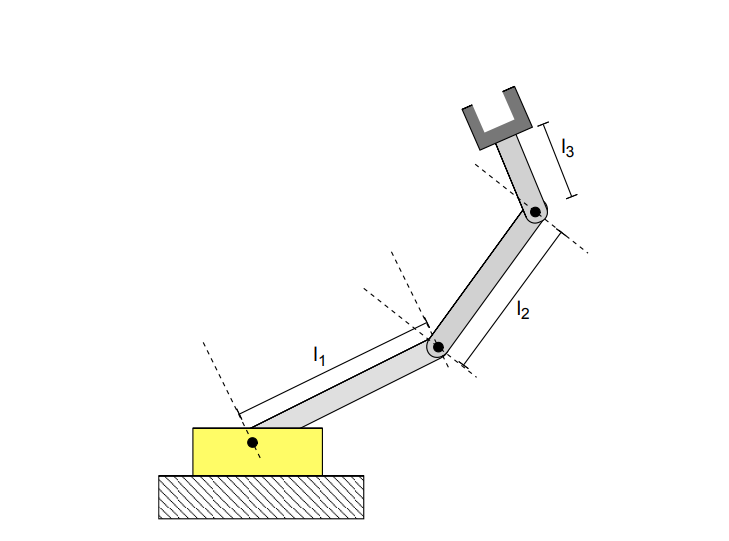

In [47]:
import sympy as sp
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex = 'mathjax', pretty_print = False)
from IPython.display import Image
Image('Kinematics_1.png', width = 400)

## Symbols

In [48]:
from sympy.physics.mechanics import dynamicsymbols

In [49]:
q1, q2, q3, l1, l2, l3, theta, alpha, a, d = dynamicsymbols('q1 q2 q3  l1 l2 l3 theta alpha a d')
q1, q2, q3, l1, l2, l3, theta, alpha, a, d 

(q1, q2, q3, l1, l2, l3, theta, alpha, a, d)

## Matrices and Calculations

In [50]:
T = sp.Matrix([[sp.cos(theta), -sp.sin(theta), 0, a],
                 [sp.cos(alpha)*sp.sin(theta), sp.cos(theta)*sp.cos(alpha), -sp.sin(alpha), -sp.sin(alpha)*d],
                 [sp.sin(alpha)*sp.sin(theta), sp.sin(alpha)*sp.cos(theta), sp.cos(alpha), sp.cos(alpha)*d],
                 [0,0,0,1]])
T


Matrix([
[           cos(theta),           -sin(theta),           0,             a],
[sin(theta)*cos(alpha), cos(alpha)*cos(theta), -sin(alpha), -d*sin(alpha)],
[sin(alpha)*sin(theta), sin(alpha)*cos(theta),  cos(alpha),  d*cos(alpha)],
[                    0,                     0,           0,             1]])

In [51]:
T01 = T.subs({alpha:0, a:0, theta:q1, d:0})
T01


Matrix([
[cos(q1), -sin(q1), 0, 0],
[sin(q1),  cos(q1), 0, 0],
[      0,        0, 1, 0],
[      0,        0, 0, 1]])

In [52]:
T12 = T.subs({alpha:0, a:l1, theta:q2, d:0})
T12

Matrix([
[cos(q2), -sin(q2), 0, l1],
[sin(q2),  cos(q2), 0,  0],
[      0,        0, 1,  0],
[      0,        0, 0,  1]])

In [53]:
T23 = T.subs({alpha:0, a:l2, theta:q3, d:0})
T23

Matrix([
[cos(q3), -sin(q3), 0, l2],
[sin(q3),  cos(q3), 0,  0],
[      0,        0, 1,  0],
[      0,        0, 0,  1]])

In [54]:
T34 = T.subs({alpha:0, a:l3, theta:0, d:0})
T34

Matrix([
[1, 0, 0, l3],
[0, 1, 0,  0],
[0, 0, 1,  0],
[0, 0, 0,  1]])

In [55]:
T02 = (T01*T12)
T02

Matrix([
[-sin(q1)*sin(q2) + cos(q1)*cos(q2), -sin(q1)*cos(q2) - sin(q2)*cos(q1), 0, l1*cos(q1)],
[ sin(q1)*cos(q2) + sin(q2)*cos(q1), -sin(q1)*sin(q2) + cos(q1)*cos(q2), 0, l1*sin(q1)],
[                                 0,                                  0, 1,          0],
[                                 0,                                  0, 0,          1]])

In [56]:
T03 = (T02*T23)
T03

Matrix([
[(-sin(q1)*sin(q2) + cos(q1)*cos(q2))*cos(q3) + (-sin(q1)*cos(q2) - sin(q2)*cos(q1))*sin(q3), -(-sin(q1)*sin(q2) + cos(q1)*cos(q2))*sin(q3) + (-sin(q1)*cos(q2) - sin(q2)*cos(q1))*cos(q3), 0, (-sin(q1)*sin(q2) + cos(q1)*cos(q2))*l2 + l1*cos(q1)],
[ (-sin(q1)*sin(q2) + cos(q1)*cos(q2))*sin(q3) + (sin(q1)*cos(q2) + sin(q2)*cos(q1))*cos(q3),   (-sin(q1)*sin(q2) + cos(q1)*cos(q2))*cos(q3) - (sin(q1)*cos(q2) + sin(q2)*cos(q1))*sin(q3), 0,  (sin(q1)*cos(q2) + sin(q2)*cos(q1))*l2 + l1*sin(q1)],
[                                                                                          0,                                                                                            0, 1,                                                    0],
[                                                                                          0,                                                                                            0, 0,                                                    1]])

In [57]:
T04 = (T03*T34)
T04

Matrix([
[(-sin(q1)*sin(q2) + cos(q1)*cos(q2))*cos(q3) + (-sin(q1)*cos(q2) - sin(q2)*cos(q1))*sin(q3), -(-sin(q1)*sin(q2) + cos(q1)*cos(q2))*sin(q3) + (-sin(q1)*cos(q2) - sin(q2)*cos(q1))*cos(q3), 0, ((-sin(q1)*sin(q2) + cos(q1)*cos(q2))*cos(q3) + (-sin(q1)*cos(q2) - sin(q2)*cos(q1))*sin(q3))*l3 + (-sin(q1)*sin(q2) + cos(q1)*cos(q2))*l2 + l1*cos(q1)],
[ (-sin(q1)*sin(q2) + cos(q1)*cos(q2))*sin(q3) + (sin(q1)*cos(q2) + sin(q2)*cos(q1))*cos(q3),   (-sin(q1)*sin(q2) + cos(q1)*cos(q2))*cos(q3) - (sin(q1)*cos(q2) + sin(q2)*cos(q1))*sin(q3), 0,   ((-sin(q1)*sin(q2) + cos(q1)*cos(q2))*sin(q3) + (sin(q1)*cos(q2) + sin(q2)*cos(q1))*cos(q3))*l3 + (sin(q1)*cos(q2) + sin(q2)*cos(q1))*l2 + l1*sin(q1)],
[                                                                                          0,                                                                                            0, 1,                                                                                                               

## Simplified Matrix and Equations

In [58]:
Tsimplified= sp.Matrix([[T04[0,0].simplify(), T04[0,1].simplify(), T04[0,2].simplify(), T04[0,3].simplify()], 
                        [T04[1,0].simplify(), T04[1,1].simplify(), T04[1,2].simplify(), T04[1,3].simplify()],
                        [T04[2,0].simplify(), T04[2,1].simplify(), T04[2,2].simplify(), T04[2,3].simplify()],
                        [T04[3,0].simplify(), T04[3,1].simplify(), T04[3,2].simplify(), T04[3,3].simplify()]])

Tsimplified

Matrix([
[cos(q1 + q2 + q3), -sin(q1 + q2 + q3), 0, l1*cos(q1) + l2*cos(q1 + q2) + l3*cos(q1 + q2 + q3)],
[sin(q1 + q2 + q3),  cos(q1 + q2 + q3), 0, l1*sin(q1) + l2*sin(q1 + q2) + l3*sin(q1 + q2 + q3)],
[                0,                  0, 1,                                                   0],
[                0,                  0, 0,                                                   1]])

In [59]:
px= Tsimplified[0,3]
px

l1*cos(q1) + l2*cos(q1 + q2) + l3*cos(q1 + q2 + q3)

In [60]:
py = Tsimplified[1,3]
py

l1*sin(q1) + l2*sin(q1 + q2) + l3*sin(q1 + q2 + q3)

In [61]:
fx = sp.lambdify((l1, l2, l3, q1, q2, q3), px, 'numpy')
fy = sp.lambdify((l1, l2, l3, q1, q2, q3), py, 'numpy')

## Plots

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
d2r = np.deg2rad

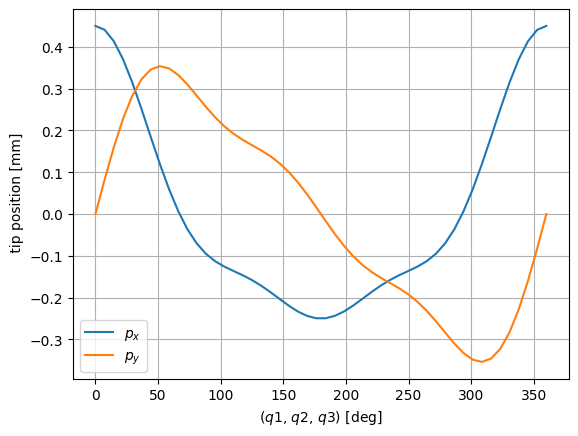

In [63]:
q1s = np.linspace(d2r(0), d2r(360)) # desired range of motion for joint 1
q2s = np.linspace(d2r(0), d2r(360)) # desired range of motion for joint 2
q3s = np.linspace(d2r(0), d2r(360)) # desired range of motion for joint 3

zx = np.array(fx(0.3, 0.10, 0.05, q1s, q2s, q3s))
zy = np.array(fy(0.3, 0.10, 0.05, q1s, q2s, q3s))
fig, ax1 = plt.subplots()
ax1.plot(np.rad2deg(q1s), zx, label = r'$p_x$')
ax1.plot(np.rad2deg(q1s), zy, label = r'$p_y$')
ax1.set_xlabel(r'($q1$, $q2$, $q3$) [deg]')
ax1.set_ylabel(r' tip position [mm]')
plt.legend()
plt.grid()


In [64]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) # for offline mode in Jupyter Notebook use
import plotly.offline as py
import plotly.graph_objs as go
from numpy import * # Not recommended, but we use to avoid rewriting the forward kinematic equations with prefix 'np'

In [65]:
q11 = np.linspace(d2r(0), d2r(360))
q22 = np.linspace(d2r(0), d2r(360))
q33 = np.linspace(d2r(0), d2r(360))

q1, q2 = np.meshgrid(q11, q22)
q2, q3 = np.meshgrid(q22, q33)

l_range = [3]

px1 = {}
py1 = {}
pz1 = {}

for i in l_range:
    l1 = i - 2.7
    l2 = i - 2.9
    l3 = i - 2.95

pxa = (cos(q3)*(cos(q1)*cos(q2) - sin(q1)*sin(q2)) + sin(q3)*(cos(q1)*(-sin(q2)) - sin(q1)*cos(q2)))*l3 + (cos(q1)*cos(q2) - sin(q1)*sin(q2))*l2 + cos(q1)*l1
pya = (cos(q3)*(sin(q1)*cos(q2) + sin(q2)*cos(q1)) + sin(q3)*((-sin(q2))*sin(q1) + cos(q1)*cos(q2)))*l3 + (sin(q1)*cos(q2) + sin(q2)*cos(q1))*l2 + sin(q1)*l1
 
px1['x{0}'.format(i)] = pxa
py1['x{0}'.format(i)] = pya



In [66]:
pxx = px1['x3']
pyy = py1['x3']
pzz = pyy*0
 #dummy zero points for z-axis, as it doesn't exist

In [67]:
trace1 = go.Surface(z = pzz, x = pyy, y = pxx,
                    colorscale = 'Blues', 
                    showscale = False, 
                    opacity = 0.7,
                   )
data = [trace1]

In [68]:
layout = go.Layout(scene = dict(
                    xaxis = dict(title = 'X (mm)'),
                    yaxis = dict(title = 'Y (mm)'),
                    zaxis = dict(title = 'Z (mm)'),
                    ),
                  )

In [69]:
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)